In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [35]:
pip install SQLAlchemy


Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install python-dateutil


Note: you may need to restart the kernel to use updated packages.


# Reflect Tables into SQLAlchemy ORM

In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [41]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
session = Session(engine)

/var/folders/6p/rc8d87pd2tz6q2vh3sj6w2900000gn/T/ipykernel_74640/4202933763.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [14]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/6p/rc8d87pd2tz6q2vh3sj6w2900000gn/T/ipykernel_74640/930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [55]:
# View all of the classes that automap found
classes = Base.classes.keys()

print("Classes found by automap:")
for class_name in classes:
    print(class_name)

Classes found by automap:
station
measurement


In [15]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
from sqlalchemy import func

most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"Most Recent Date: {most_recent_date}")

Most Recent Date: 2017-08-23


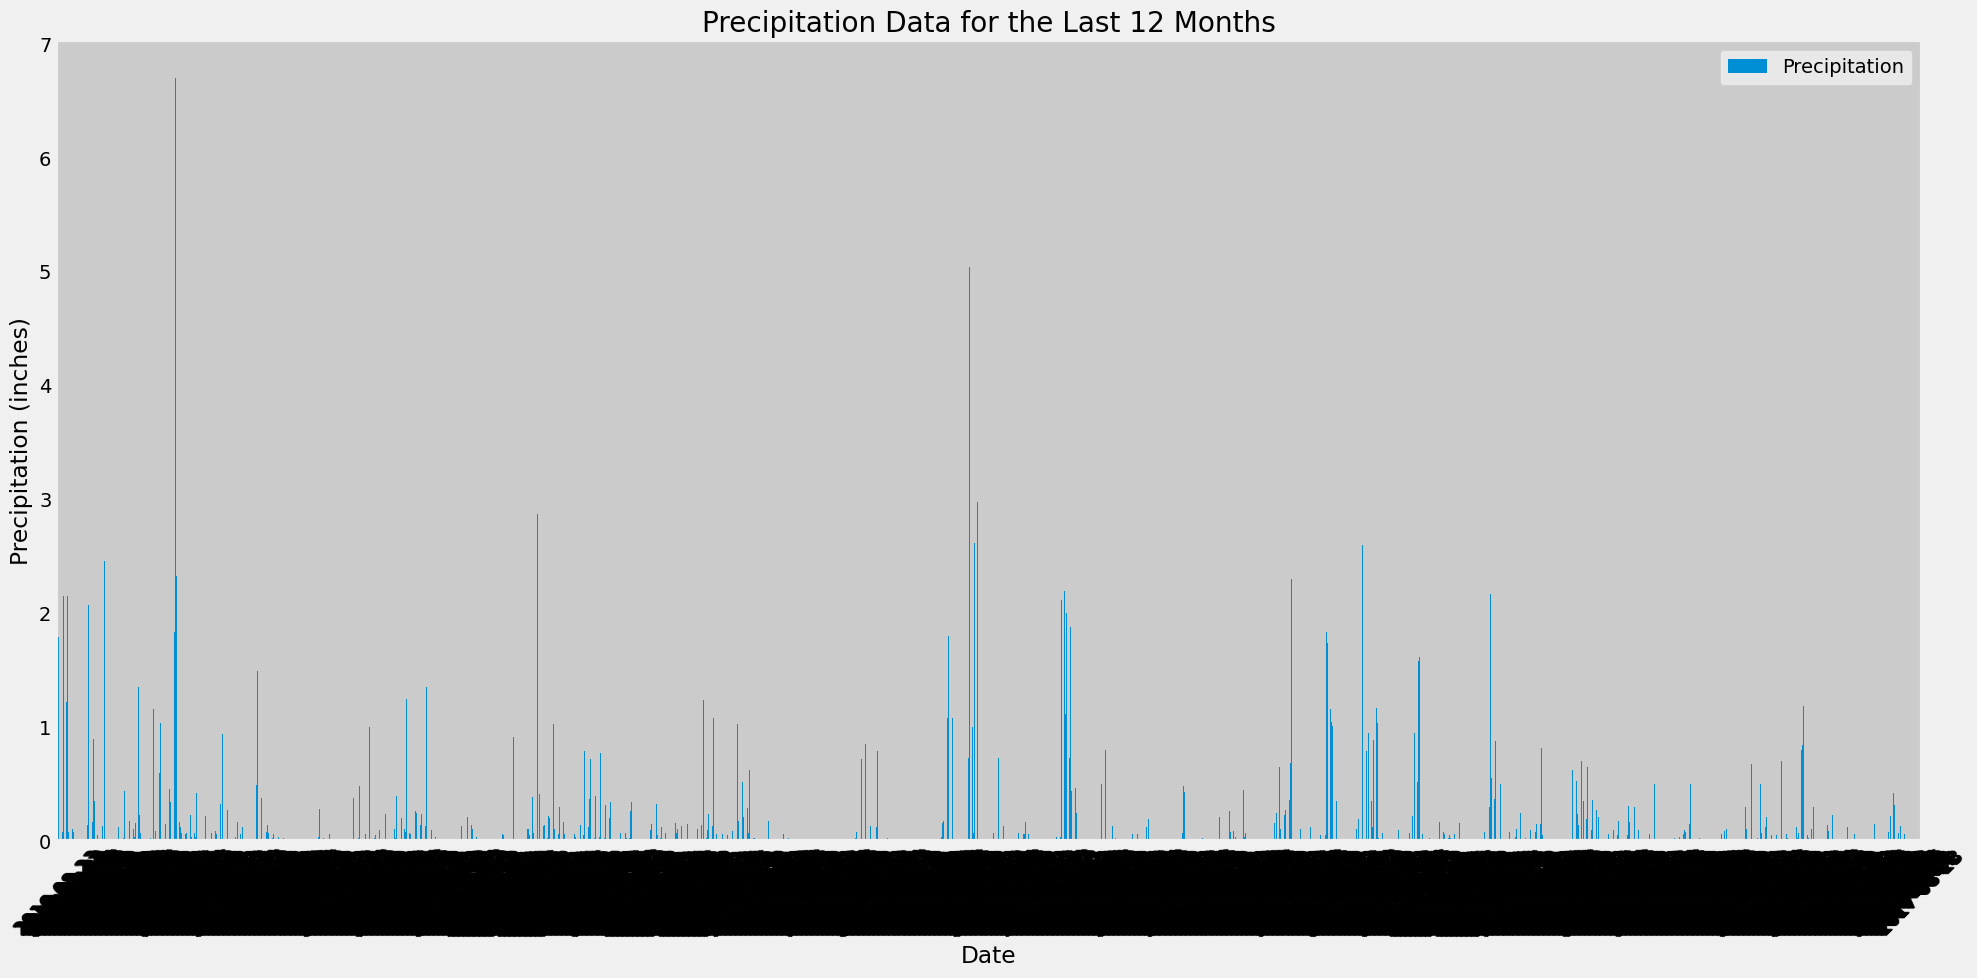

In [78]:
# Date in the dataset:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from datetime import datetime, timedelta

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. Don
# Calculate the date one year from the last date in data set.
one_year_ago =dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='bar', figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Data for the Last 12 Months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).scalar()
print(f"Total Number of Stations: {station_count}")


Total Number of Stations: 9


In [80]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

most_active_station = most_active_stations[0][0]


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [81]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

min_temp, max_temp, avg_temp = temp_stats[0]
print(f"Station {most_active_station} - Min Temp: {min_temp}, Max Temp: {max_temp}, Avg Temp: {avg_temp}")


Station USC00519281 - Min Temp: 54.0, Max Temp: 85.0, Avg Temp: 71.66378066378067


# Close Session

In [16]:
# Close Session
session.close()